# Mapeando el Universo

# Introducción al aprendizaje automático

## **1)** Tomar el dataset "limpio" obtenido del práctico anterior y considerar algunos de los siguientes conjuntos de variables
* modelMag_*, colores_modelMag, devRad_*
* modelMag_*, colores_modelMag, expRad_*
* petroMag_*, colores_petroMag, petroRad_*, petroR50_*, petroR90_*

### Lectura de datos

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
#Libs posiblemente faltantes
import os
import gc
import sys
import pkg_resources
#if 'sidetable' not in {pkg.key for pkg in pkg_resources.working_set}:
#    !pip install sidetable
if 'psutil' not in {pkg.key for pkg in pkg_resources.working_set}:
    !pip install psutil
#if 'xgboost' not in {pkg.key for pkg in pkg_resources.working_set}:
#    !pip install xgboost
if 'scikit-learn' not in {pkg.key for pkg in pkg_resources.working_set}:
    !pip install scikit-learn
in_colab = 'google.colab' in sys.modules

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psutil


from sklearn import datasets, linear_model
from sklearn.linear_model import (LinearRegression, SGDClassifier, Ridge, SGDRegressor)
from sklearn.preprocessing import (PolynomialFeatures, MinMaxScaler)
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import (train_test_split, KFold, GridSearchCV)
from sklearn.metrics import (mean_squared_error, r2_score, precision_score, recall_score, f1_score, confusion_matrix)
from sklearn.preprocessing import StandardScaler
import itertools

# Perceptron
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

In [5]:
def Memory():
    """Imprime la cantidad de memoria RAM utilizada por el proceso 
    hasta el momento, en GB"""
    gc.collect()
    process = psutil.Process(os.getpid())
    print('Memoria actual utilizada: %.2f GB' %(process.memory_full_info().rss*1e-9))
    return

In [6]:
filename = "../dataset/data_filter.csv"

In [7]:
data = pd.read_csv(filename,index_col=0)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608921 entries, 957075158303008768 to 957064712942544896
Data columns (total 49 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   z                               608921 non-null  float64
 1   velDisp                         608921 non-null  float64
 2   ra                              608921 non-null  float64
 3   dec                             608921 non-null  float64
 4   subClass                        608921 non-null  object 
 5   modelMag_u                      608921 non-null  float64
 6   modelMag_g                      608921 non-null  float64
 7   modelMag_r                      608921 non-null  float64
 8   modelMag_i                      608921 non-null  float64
 9   modelMag_z                      608921 non-null  float64
 10  petroMag_u                      608921 non-null  float64
 11  petroMag_g                      608921 non-null  

In [9]:
data.describe()

,z,velDisp,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroMag_u,...,subClass_STARFORMING,subClass_STARFORMING_BROADLINE,modelColor_ug,modelColor_gr,modelColor_ri,modelColor_iz,petroColor_ug,petroColor_gr,petroColor_ri,petroColor_iz
count,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,...,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000
mean,0.104342,135.548575,184.663017,25.119669,19.486345,17.820442,16.964847,16.554727,16.264905,19.482649,...,0.313254,0.001363,1.665904,0.855595,0.410120,0.289823,1.615551,0.831818,0.386924,0.233235
std,0.053560,74.773948,58.737151,19.010990,0.960267,0.763514,0.675561,0.673814,0.707239,1.157991,...,0.463817,0.036895,0.458326,0.296790,0.097406,0.179993,0.799674,0.352273,0.220364,0.373315
min,-0.006568,0.000000,0.001718,-11.252825,14.226100,13.574420,13.890400,13.758980,12.382540,11.984880,...,0.000000,0.000000,-9.993700,-6.423580,-4.947020,-13.819450,-19.256860,-3.612750,-22.090000,-21.056590
25%,0.066619,83.816160,151.925664,9.675502,18.901570,17.420410,16.635270,16.226100,15.916920,18.858070,...,0.000000,0.000000,1.343030,0.675080,0.373660,0.248440,1.239470,0.639410,0.350710,0.188920
50%,0.097589,131.624900,185.461795,23.769607,19.528360,17.971860,17.157480,16.737970,16.430190,19.460280,...,0.000000,0.000000,1.718690,0.875560,0.422390,0.315140,1.542990,0.843520,0.404890,0.271040
75%,0.136380,181.387900,220.488190,39.551447,20.146590,18.358100,17.474630,17.051040,16.752250,20.062810,...,1.000000,0.000000,1.938110,1.022410,0.463140,0.353350,1.817090,0.995580,0.445390,0.324840
max,1.000208,850.000000,359.997379,70.268882,30.599800,28.401410,25.141300,20.176000,28.553240,41.270800,...,1.000000,1.000000,13.198990,13.050000,9.648550,5.005140,24.066280,19.110600,4.211290,19.374340


In [10]:
data.columns

Index(['z', 'velDisp', 'ra', 'dec', 'subClass', 'modelMag_u', 'modelMag_g',
       'modelMag_r', 'modelMag_i', 'modelMag_z', 'petroMag_u', 'petroMag_g',
       'petroMag_r', 'petroMag_i', 'petroMag_z', 'deVRad_u', 'deVRad_g',
       'deVRad_r', 'deVRad_i', 'deVRad_z', 'expRad_u', 'expRad_g', 'expRad_r',
       'expRad_i', 'expRad_z', 'petroRad_u', 'petroRad_g', 'petroRad_r',
       'petroRad_i', 'petroRad_z', 'spiral', 'elliptical', 'uncertain',
       'subClass_0', 'subClass_AGN', 'subClass_AGN_BROADLINE',
       'subClass_BROADLINE', 'subClass_STARBURST',
       'subClass_STARBURST_BROADLINE', 'subClass_STARFORMING',
       'subClass_STARFORMING_BROADLINE', 'modelColor_ug', 'modelColor_gr',
       'modelColor_ri', 'modelColor_iz', 'petroColor_ug', 'petroColor_gr',
       'petroColor_ri', 'petroColor_iz'],
      dtype='object')

### - Para liberar memoria reducimos en lo posible el dtype

In [11]:
from fail_safe_parallel_memory_reduction import Reducer

reducer = Reducer(n_jobs=1)
data = reducer.reduce(data)

reduced df from 232.2849 MB to 97.5600 MB in 1.06 seconds


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608921 entries, 957075158303008768 to 957064712942544896
Data columns (total 49 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   z                               608921 non-null  float32 
 1   velDisp                         608921 non-null  float32 
 2   ra                              608921 non-null  float32 
 3   dec                             608921 non-null  float32 
 4   subClass                        608921 non-null  category
 5   modelMag_u                      608921 non-null  float32 
 6   modelMag_g                      608921 non-null  float32 
 7   modelMag_r                      608921 non-null  float32 
 8   modelMag_i                      608921 non-null  float32 
 9   modelMag_z                      608921 non-null  float32 
 10  petroMag_u                      608921 non-null  float32 
 11  petroMag_g                      6089

## Set de datos

In [37]:
#-- Jugar con esta lista, agregar o sacar o cambiar las columnas.

filter_col=[];
filter_col.extend([col for col in data if col.startswith(('modelMag', 'modelColor','deVRad','expRad','velDisp', 'z'))])

filter_colp=[]
filter_colp.extend([col for col in data if col.startswith(('petroMag', 'petroColor','petroRad','velDisp', 'z'))])

filter_col_sre=[];
filter_col_sre.extend([col for col in data if col.startswith(('modelMag', 'modelColor','velDisp', 'z'))])

#filter_colp=[]
#filter_colp.extend([col for col in data if col.startswith(('petroMag', 'petroColor','petroRad','velDisp', 'z'))])


In [169]:
print(filter_col)
print(filter_colp)
print(filter_col_sre)

['z', 'velDisp', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z', 'deVRad_u', 'deVRad_g', 'deVRad_r', 'deVRad_i', 'deVRad_z', 'expRad_u', 'expRad_g', 'expRad_r', 'expRad_i', 'expRad_z', 'modelColor_ug', 'modelColor_gr', 'modelColor_ri', 'modelColor_iz']
['z', 'velDisp', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z', 'petroRad_u', 'petroRad_g', 'petroRad_r', 'petroRad_i', 'petroRad_z', 'petroColor_ug', 'petroColor_gr', 'petroColor_ri', 'petroColor_iz']
['z', 'velDisp', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z', 'modelColor_ug', 'modelColor_gr', 'modelColor_ri', 'modelColor_iz']


### Variables usadas vs redshift

In [ ]:
for i in filter_col:
    plt.scatter(data[i],data['z'], facecolor="dodgerblue", edgecolor="k", label="datos")
    plt.title(i)
    plt.show()

## **2)** Estimación del modelo de regresión
* **2.1** Emplear el modelo de regresión lineal para estimar la variables _redshift_.
* **2.2** Considere utilizar o no regulación
* **2.3** Utilizar algún método para evaluar la complejidad del/de los modelo/s.
* **2.4** Evaluar que sucede si se distrimina por tipo de galaxia.

### SGDRegressor

Error: 0.001146


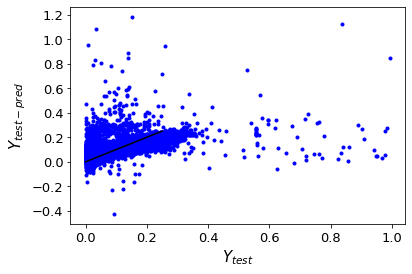

Error: 0.001290


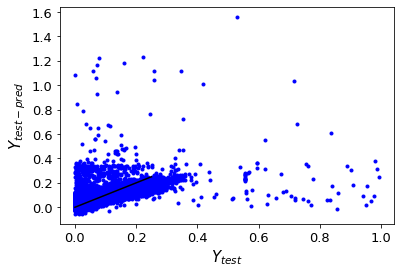

Error: 0.001152


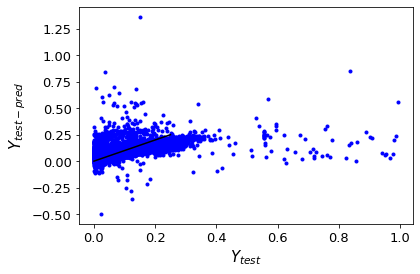

Error minimo: 0.001146


In [53]:
selector =[filter_col, filter_colp, filter_col_sre]
min_selector_error = []
min_selector_indx = []

scaler = StandardScaler()

for j in selector:

    X, y = data[j[1:]], data['z']
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
    
#    print(X_train.shape)

    train_error = []
    test_error = []
    y_test_pred = []

    sgd_reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=10000))#,  penalty=None, eta0=0.1))

    # Entreno los modelos

    sgd_reg.fit(X_train, y_train.ravel())

    # Predigo los valores de test
    y_train_pred = sgd_reg.predict(X_train)

    # Predigo los valores de train
    y_test_pred = sgd_reg.predict(X_test)

    # Error cuadratico medio entrenamiento
#    train_error.append(mean_squared_error(y_train, y_train_pred))

    # Error cuadratico medio test
#    print(y_test.shape,y_test_pred.shape )
    test_error.append(mean_squared_error(y_test, y_test_pred))

    print("Error: %f"%(test_error[0]))
    min_selector_error.append(min(test_error))
    min_selector_indx.append(test_error.index(min(test_error)))


    # Grafico error
    plt.plot(y_test, y_test_pred, 'b.')
    plt.plot([0,0.25], [0,0.25], 'k-')#, color="blue")
    plt.xlabel(r'$Y_{test}$', fontsize=15)
    plt.ylabel(r'$Y_{test-pred}$', fontsize=15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()

print("Error minimo: %f"%(min_selector_error[0]))

### Regularización  
Se ven problemas de overfitting en el grado 3 y 4. Ridge Regression usa una regresión lineal pero le agrega el término de regularización L2 (con la constante alpha).  
<img src="images/CodeCogsEqn.gif">



MSE: 0.001124 set 0
MSE: 0.001101 set 0
MSE: 0.001105 set 0
MSE: 0.001154 set 0


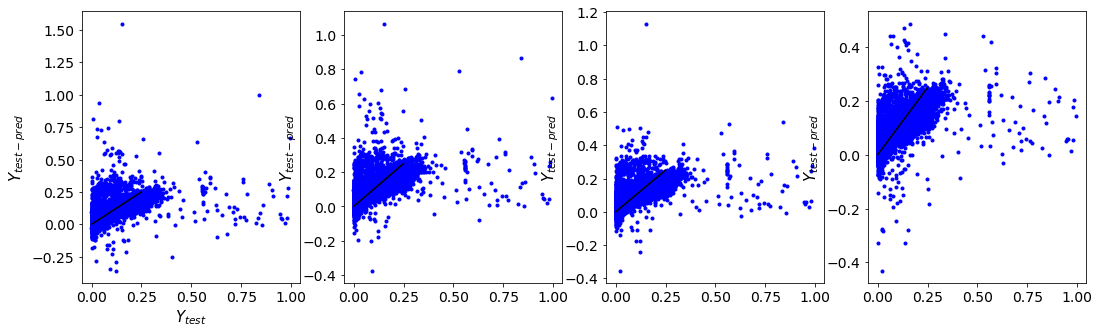

MSE: 0.001270 set 1
MSE: 0.001212 set 1
MSE: 0.001244 set 1
MSE: 0.001238 set 1


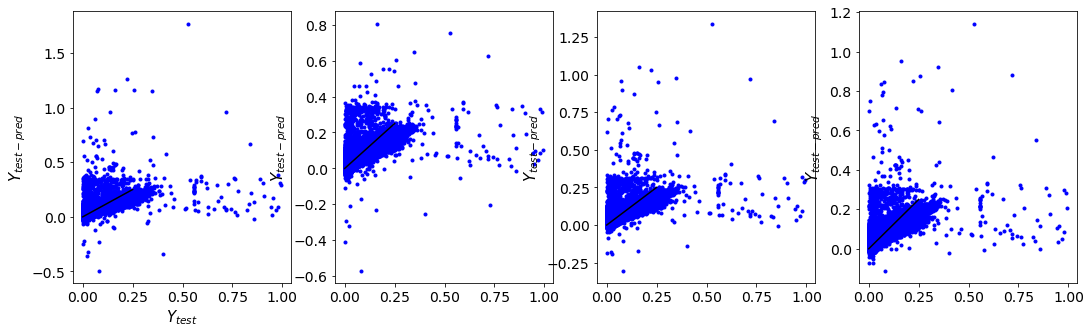

MSE: 0.001152 set 2
MSE: 0.001140 set 2
MSE: 0.001158 set 2
MSE: 0.001155 set 2


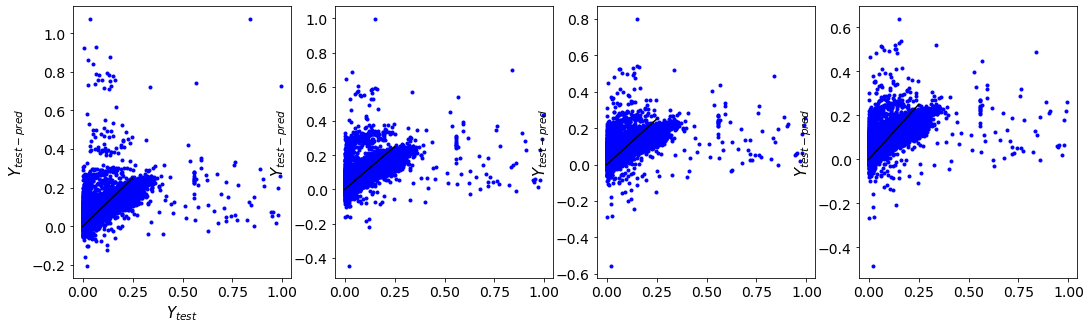

El error es minimo para el minimo: 0.001154
Faltaria agregar para que set ocurre este minimo y para que alpha
Mejorar los graficos, los labels, limites bla bla


In [96]:
selector =[filter_col, filter_colp, filter_col_sre]
min_selector_error = []
min_selector_indx = []

scaler = StandardScaler()


alphas = [0.0, 1e-5, 1e-1, 0.16]


for ind,j in enumerate(selector):
    h=0 

    X, y = data[j[1:]], data['z']
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

    f, ax = plt.subplots(1, 4, figsize=(18, 5))

    for i in alphas:

        train_error = []
        test_error = []
        y_test_pred = []

        sgd_reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=10000, alpha=alphas[h]))#,  penalty=None, eta0=0.1))

    # Entreno los modelos

        sgd_reg.fit(X_train, y_train.ravel())

    # Predigo los valores de test
        y_train_pred = sgd_reg.predict(X_train)

    # Predigo los valores de train
        y_test_pred = sgd_reg.predict(X_test)

    # Error cuadratico medio entrenamiento
#    train_error.append(mean_squared_error(y_train, y_train_pred))

    # Error cuadratico medio test
#    print(y_test.shape,y_test_pred.shape )
        test_error.append(mean_squared_error(y_test, y_test_pred))

        print("MSE: %f"%(test_error[0]),"set %i"%(ind))


    # Grafico error
        ax[h].plot(y_test, y_test_pred, 'b.')
        ax[h].plot([0,0.25], [0,0.25], 'k-')#, color="blue")
        ax[h].set_ylabel(r'$Y_{test-pred}$', fontsize=15)
        ax[h].tick_params(labelsize=14)
#        ax[h].title('MSE {}'.format(test_error[0]))
#        
        
        if h==0:
            ax[h].set_xlabel(r'$Y_{test}$', fontsize=15)

        h=h+1
#        print(h, alphas[h])
    plt.show()
    min_selector_error.append(min(test_error))
    min_selector_indx.append(test_error.index(min(test_error)))
    
print("El error es minimo para el minimo: %f"%(min(min_selector_error)))#,"Correspondiente al set: %f"%(min(min_selector_error)) )
print("Faltaria agregar para que set ocurre este minimo y para que alpha")
print("Mejorar los graficos, los labels, limites bla bla")



### Evaluación de la complejidad de los modelos (?? podría ser a través del .score() ??)

## Discriminación por morfología de la galaxia


In [110]:

data_spiral = data[data['spiral'] == 1]
data_elliptical = data[data['elliptical'] == 1]

tipo=['spiral', 'elliptical']

for i in tipo:
    print(i)
    if i=='spiral':
        print(np.where(vars()['data_'+str(i)]['elliptical']==1))
    if i=='elliptical':
        print(np.where(vars()['data_'+str(i)]['spiral']==1))



spiral
(array([], dtype=int64),)
(array([     0,      1,      2, ..., 164780, 164781, 164782]),)
elliptical


MSE: 0.000685 set 0
MSE: 0.000465 set 0


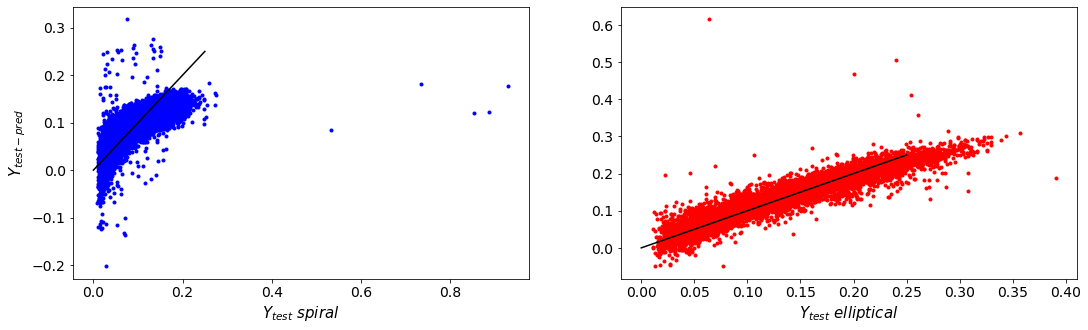

MSE: 0.000789 set 1
MSE: 0.003288 set 1


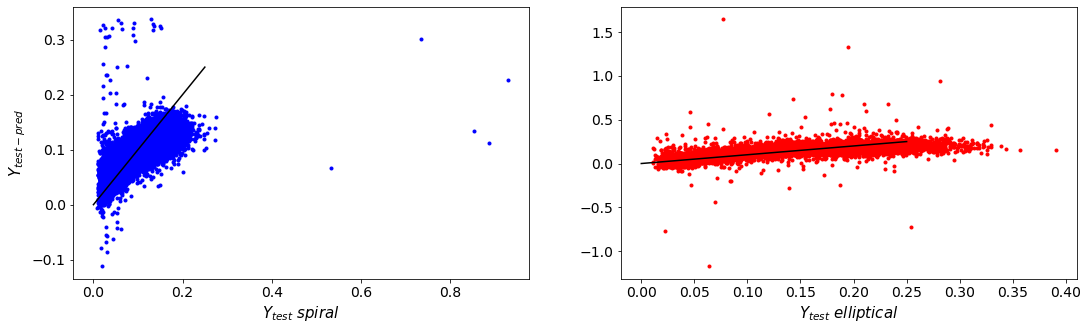

MSE: 0.000737 set 2
MSE: 0.000548 set 2


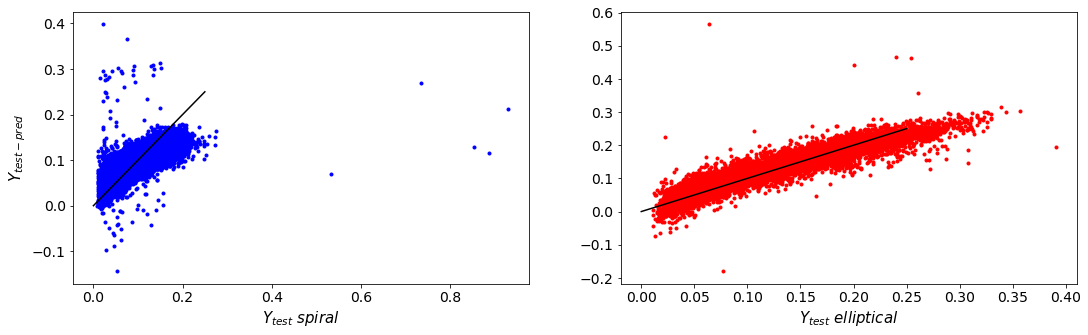

El error es minimo para el minimo: 0.000465
Faltaria agregar para que set ocurre este minimo y para que alpha
Mejorar los graficos, los labels, limites bla bla


In [122]:
selector =[filter_col, filter_colp, filter_col_sre]

min_selector_error = []
min_selector_indx = []

scaler = StandardScaler()


tipo=['spiral', 'elliptical']
c=['blue', 'red']

for ind,j in enumerate(selector):
    h=0 

    f, ax = plt.subplots(1,2 , figsize=(18, 5))

    for m in tipo:

        X, y = vars()['data_'+str(m)][j[1:]], vars()['data_'+str(m)]['z']
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

        train_error = []
        test_error = []
        y_test_pred = []

        sgd_reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=10000, alpha=1e-5))# Sacamos este valor de los graficos anteriores

        # Entreno los modelos

        sgd_reg.fit(X_train, y_train.ravel())

        # Predigo los valores de test
        y_train_pred = sgd_reg.predict(X_train)

        # Predigo los valores de train
        y_test_pred = sgd_reg.predict(X_test)

        # Error cuadratico medio entrenamiento
#        train_error.append(mean_squared_error(y_train, y_train_pred))

        # Error cuadratico medio test
        test_error.append(mean_squared_error(y_test, y_test_pred))

        print("MSE: %f"%(test_error[0]),"set %i"%(ind))


        # Grafico error
        ax[h].plot(y_test, y_test_pred, '.', color=c[h])
        ax[h].plot([0,0.25], [0,0.25], 'k-')#, color="blue")
        ax[h].tick_params(labelsize=14)

        if h==0:
            ax[h].set_ylabel(r'$Y_{test-pred}$', fontsize=15)

        if h==0:
            ax[h].set_xlabel(r'$Y_{test}\,\, spiral$', fontsize=15)
        if h==1:
            ax[h].set_xlabel(r'$Y_{test}\,\, elliptical$', fontsize=15)
    
        h=h+1
    plt.show()
    min_selector_error.append(min(test_error))
    min_selector_indx.append(test_error.index(min(test_error)))
    
print("El error es minimo para el minimo: %f"%(min(min_selector_error)))#,"Correspondiente al set: %f"%(min(min_selector_error)) )
print("Faltaria agregar para que set ocurre este minimo y para que alpha")
print("Mejorar los graficos, los labels, limites bla bla")


### --------------------------------------------------
### Se podria probar con distintos alpha, y discriminando por tipo de galaxias.Tambien indicar la cantidad de galaxias que nos quedan al discriminar por morfología. Ej data_spiral.shape, etc 
### --------------------------------------------------

### --------------------------------------------------
### --------------------------------------------------
### A partir de acá no toque nada. Sigue lo viejo. 
### --------------------------------------------------
### --------------------------------------------------

## **3)** Emplear algunos (más de uno) de los modelos de clasificación (perceptrón, regresión logística, vecinos más cercanos) para clasificar las galaxias en elípticas y espirales a partir de las variables elegidas.
* Computar las metricas accuracy,precision, recall, F1, matriz de confusión
* Visualización de la frontera de decisión
   

In [123]:
data_sp_or_ell = pd.concat([data_spiral, data_elliptical])

In [124]:
data_sp_or_ell

,z,velDisp,ra,dec,subClass,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,...,subClass_STARFORMING,subClass_STARFORMING_BROADLINE,modelColor_ug,modelColor_gr,modelColor_ri,modelColor_iz,petroColor_ug,petroColor_gr,petroColor_ri,petroColor_iz
specObjID,,,,,,,,,,,,,,,,,,,,,
957065537576265728,0.140137,138.908295,197.473343,4.417710,0,19.562010,18.195589,17.342859,16.92395,16.610790,...,0,0,1.36642,0.85273,0.41891,0.31316,1.07275,0.76730,0.36148,0.22301
637262958233151488,0.098105,135.153793,137.577469,2.613135,0,20.378111,18.375959,17.377769,16.95891,16.618650,...,0,0,2.00215,0.99819,0.41886,0.34026,1.87594,1.00148,0.41436,0.36765
637266806523848704,0.098102,112.930199,137.866928,3.050839,0,21.065981,18.832911,17.751860,17.16733,16.693560,...,0,0,2.23307,1.08105,0.58453,0.47377,1.55629,0.93613,0.56206,0.31988
657534650943563776,0.088232,49.054508,216.967773,4.175325,STARFORMING,18.773769,17.504971,16.988010,16.68087,16.508301,...,1,0,1.26880,0.51696,0.30714,0.17257,1.21089,0.47204,0.26622,0.14915
477392312498939904,0.127602,116.658997,22.041313,14.228646,STARFORMING,19.819580,18.425529,17.617140,17.16931,16.886511,...,1,0,1.39405,0.80839,0.44783,0.28280,1.10243,0.73495,0.37401,0.32365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650874639001610240,0.068782,203.440308,160.031311,5.204556,AGN BROADLINE,18.935539,17.000320,16.091530,15.64960,15.311320,...,0,0,1.93522,0.90879,0.44193,0.33828,1.83798,0.90443,0.42873,0.30664
1070885607900735488,0.168584,227.073898,171.004379,60.107727,0,19.834660,17.821289,16.638611,16.14817,15.807540,...,0,0,2.01337,1.18268,0.49044,0.34063,2.78759,1.16712,0.49060,0.20894
680204931944179712,0.202791,187.148300,208.297684,64.036575,0,20.646339,18.801399,17.619310,17.13460,16.829741,...,0,0,1.84494,1.18209,0.48471,0.30486,1.51454,1.13949,0.46759,0.21232


In [183]:
data_filter = data_sp_or_ell[filter_col]

X, y = data_filter.iloc[:,:].values, data_sp_or_ell['spiral']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)


### Clasificador SDGC 

In [184]:
model = SGDClassifier(random_state=0, shuffle = True)

model.fit(X_train,y_train)

SGDClassifier(random_state=0)

In [185]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [186]:
print('Train Accuracy: ', np.sum(y_train_pred == y_train)/len(y_train))
print('Test Accuracy: ', np.sum(y_test_pred == y_test)/len(y_test))

Train Accuracy:  0.912717458234783
Test Accuracy:  0.9122067997145685


In [130]:
# Evaluación (evaluate):
train_error_multiple = mean_squared_error(y_train, y_train_pred)
test_error_multiple = mean_squared_error(y_test, y_test_pred)
print(f'Train error:{train_error_multiple:0.3}')
print(f'Test error:{test_error_multiple:0.3}')

Train error:0.0873
Test error:0.0878


In [131]:
precision_score(y_test, y_test_pred)

0.9082987784377452

In [132]:
recall_score(y_test, y_test_pred)

0.9835861650485437

In [133]:
f1_score(y_test, y_test_pred)

0.9444444444444445

In [134]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[ 7210  3273]
 [  541 32419]]


In [135]:
#import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta correcta')
    plt.xlabel('Etiqueta predicha')

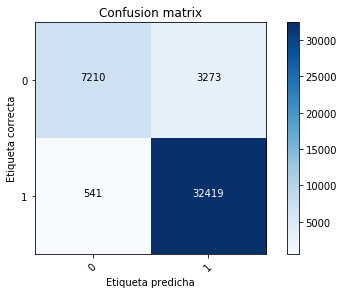

In [136]:
plot_confusion_matrix(cm, [0,1])

### Perceptron

In [138]:
regr = MLPClassifier(hidden_layer_sizes=(35), max_iter=10000,
                   activation='relu', random_state = 0,
                   solver='lbfgs')
regr.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=35, max_iter=10000, random_state=0,
              solver='lbfgs')

In [139]:
#  Predicción (predict):
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

In [140]:
# Evaluación (evaluate):
train_error_multiple = mean_squared_error(y_train, y_train_pred)
test_error_multiple = mean_squared_error(y_test, y_test_pred)
print(f'Train error:{train_error_multiple:0.3}')
print(f'Test error:{test_error_multiple:0.3}')

Train error:0.0759
Test error:0.0758


In [141]:
precision_score(y_test.values.astype(np.float), y_test_pred)

0.9394945035408456

In [142]:
recall_score(y_test, y_test_pred)

0.9619842233009709

In [143]:
f1_score(y_test, y_test_pred)

0.9506063649582515

In [144]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[ 8441  2042]
 [ 1253 31707]]


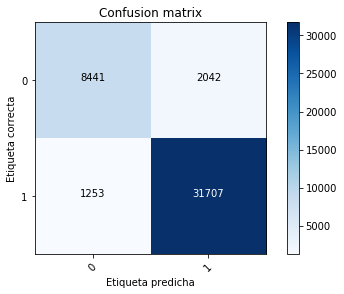

In [145]:
plot_confusion_matrix(cm, [0,1])

In [ ]:
# Gráfico de curvas de error
#plt.figure(figsize=(8,6))

#plt.plot(y_test.values, "bo", label="train")
#plt.plot(y_test_pred, "ro", label="true")
#plt.legend()
#plt.xlabel("Muestras del test")
#plt.ylabel("error cuadratico")
#plt.show()

#difference = (y_test_filter.values - y_test_pred)**2

#plt.plot(difference, "b", label="error")
#plt.legend()
#plt.xlabel("Muestras del Test")
#plt.ylabel("error")
#plt.show()

## Falta plotear la region de decisión de los dos modelos

In [161]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure(figsize=(9,8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.ocean)#OrRd_r)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Greys)

In [162]:
#regr = MLPClassifier(hidden_layer_sizes=(35), max_iter=10000,
#                   activation='relu', random_state = 0,
#                   solver='lbfgs')


In [163]:
#regr.fit(X_train, y_train)

In [164]:
#plot_decision_boundary(lambda x: regr.predict(x), X_train.T, y_train.T)
#predictions = regr.predict(X_test)
#print ('Accuracy: %d ' % ((np.sum(y_test == predictions))/float(y_test.size)*100))

In [178]:
model = SGDClassifier(random_state=0, shuffle = True)

model.fit(X_train.T[[0,8],:].T,y_train)

SGDClassifier(random_state=0)

Accuracy: 84 


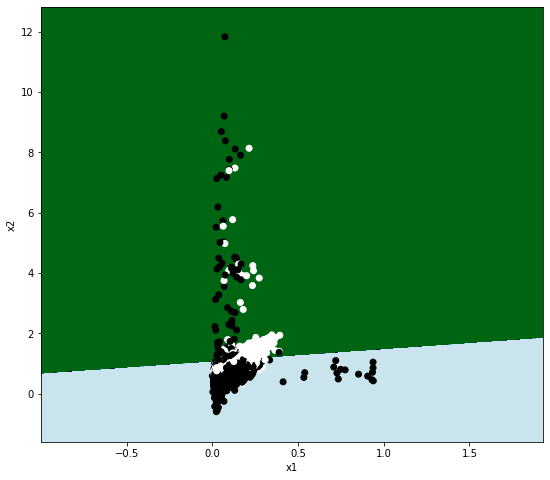

In [179]:
plot_decision_boundary(lambda x: model.predict(x), X_train.T[[0,8],:], y_train.T)
predictions = model.predict(X_test.T[[0,8],:].T)
print ('Accuracy: %d ' % ((np.sum(y_test == predictions))/float(y_test.size)*100))